In [7]:
## Problem Statement: 
## developing machine learning of classification model to identify the text from the given dataset which is AI-generated or human-written text samples.
## with the help of logistic regeression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## to remove stopwords we need to install NLP library called natural language tool kit -> used for NLP tasks -> which helps in removing the stopwords,tf-idf, stemming,lemmatization
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MYPC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
## porterstemmer is used for stemming
from sklearn.feature_extraction.text import TfidfVectorizer

## importing the alogrithm which is required for binary classification -> Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split

In [6]:
## identifying the stopwords
stopwords_list = stopwords.words('english')
type(stopwords_list)

list

In [7]:
len(stopwords_list)

198

In [8]:
stopwords_list.remove("isn't") 
## isn't is no longer stopword

In [9]:
len(stopwords_list)

197

In [2]:
## import the dataset 
data = pd.read_csv(r'C:\Users\MYPC\Downloads\archive (1)\AI_Human.csv')
data

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0
...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0
487231,The whole purpose of democracy is to create a ...,0.0
487232,I firmly believe that governments worldwide sh...,1.0
487233,I DFN't agree with this decision because a LFT...,0.0


In [8]:
data.shape

(487235, 2)

In [3]:
df = data.copy()

In [9]:
counts = df['generated'].value_counts()
counts  ## 0-AI and 1-Human

generated
0.0    305797
1.0    181438
Name: count, dtype: int64

In [10]:
df.duplicated().sum()  ## there are no duplicate values present in the given dataset

0

In [79]:
# Count total entries
total_entries = len(df['generated'])

# Count AI-generated text
ai_generated_count = df['generated'].eq(1.0).sum()

# Count human-generated text
human_generated_count = df['generated'].eq(0.0).sum()

# Print the results
print("Total :", total_entries)
print("Total text by AI :", ai_generated_count)
print("Total text by Human :", human_generated_count)

Total : 487235
Total text by AI : 181438
Total text by Human : 305797


In [83]:
percentage_ai = (ai_generated_count / total_entries) * 100
percentage_human = (human_generated_count / total_entries) * 100

print("Percentage of text by AI:", round(percentage_ai, 2), "%")
print("Percentage of text by Human:", round(percentage_human, 2), "%")

Percentage of text by AI: 37.24 %
Percentage of text by Human: 62.76 %


In [ ]:
## there are more human written text than AI, which means human written text is dominating

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [ ]:
## there are no null values present in the dataset.

In [85]:
df['generated'].describe().T

count    487235.000000
mean          0.372383
std           0.483440
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: generated, dtype: float64

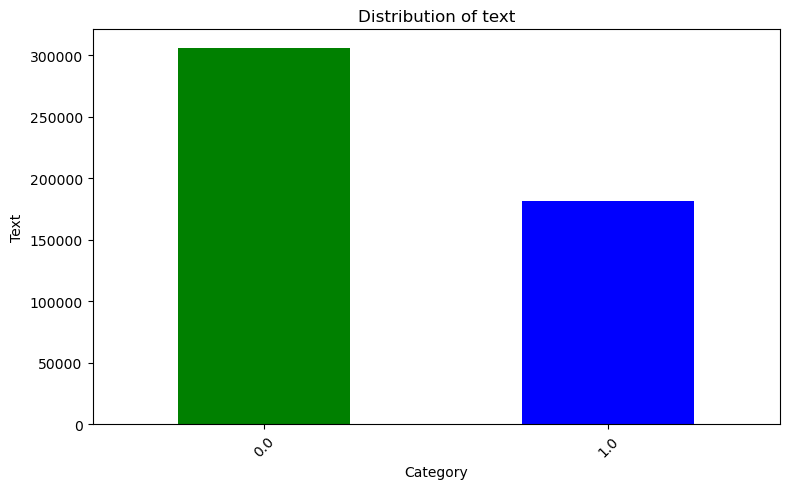

In [99]:
## plotting barplot to check the distribution of generated column
plt.figure(figsize = (8,5))
counts.plot(kind = 'bar',color = ['green','blue'])
plt.title('Distribution of text')
plt.xlabel('Category')
plt.ylabel('Text')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

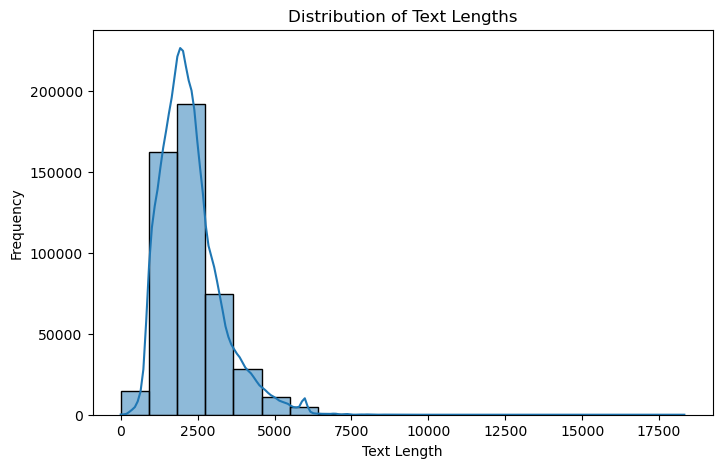

In [88]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=20, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [ ]:
## observations -> most of the text lie in between the range of 0-6000 of text length i.e. some the text are having more length.

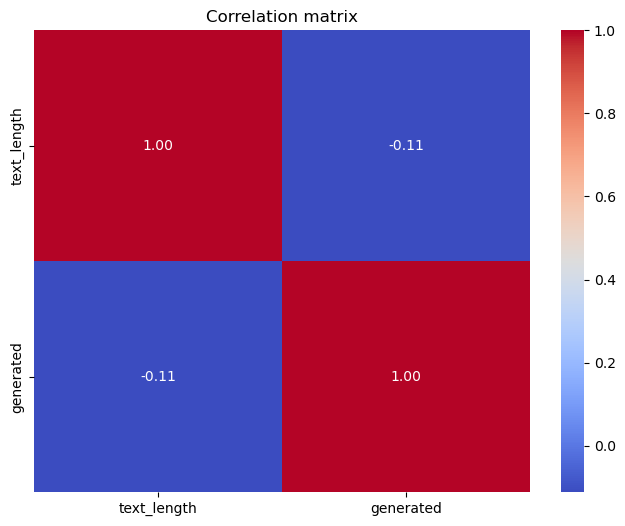

In [96]:
correlation = df[['text_length','generated']].corr()
plt.figure(figsize = (8,6))
plt.title('Correlation matrix')
sns.heatmap(correlation, cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.show()

In [ ]:
## text length is weakly correlated with generated column.

In [15]:
df.iloc[2].to_dict()

{'text': '"America\'s love affair with it\'s vehicles seems to be cooling" says Elisabeth rosenthal. To understand rosenthal\'s perspective, it is easier to suggest that America\'s car usage is decreasing slowly. This isn\'t necessarily bad in the sense that it has certain positive effects. The advantages of limiting car usage includes an increase in security and health, along with a decrease in pollution and dependence.\n\nFirstly, when car usage is limited security and health is more likely to be guaranteed. The feeling of being secure is highly important to individuals everywhere. For example, many people in colombia used public transportation during a car free day "leaving the streets of this capital city ", according to Andrew Selsky, "eerily devoid of traffic jams". The complications that stem from traffic jams end with a feeling of confidence. The plan to get from point A to B was more simple just a second ago. This complication in your personal plans leads you to become stresse

In [16]:
stemmer = PorterStemmer()
## creating object for stemming

In [17]:
import re
i = 2
print(df['text'][i])
text = re.sub('[^a-zA-z0-9]',' ',df['text'][i])
## remove special character from the text
text = text.replace('\n',' ')
text = text.lower().split()
print(text)

clean_text = []
## applying stopwords removal
for word in text:
    if not word in set(stopwords_list):
        clean_text.append(word)
print(clean_text)

## apply stemming
clean_text = [stemmer.stem(word) for word in clean_text]
print(clean_text)
clean_text = ' '.join(clean_text)
print(clean_text)

"America's love affair with it's vehicles seems to be cooling" says Elisabeth rosenthal. To understand rosenthal's perspective, it is easier to suggest that America's car usage is decreasing slowly. This isn't necessarily bad in the sense that it has certain positive effects. The advantages of limiting car usage includes an increase in security and health, along with a decrease in pollution and dependence.

Firstly, when car usage is limited security and health is more likely to be guaranteed. The feeling of being secure is highly important to individuals everywhere. For example, many people in colombia used public transportation during a car free day "leaving the streets of this capital city ", according to Andrew Selsky, "eerily devoid of traffic jams". The complications that stem from traffic jams end with a feeling of confidence. The plan to get from point A to B was more simple just a second ago. This complication in your personal plans leads you to become stressed as a feeling of

In [18]:
print(clean_text)

america love affair vehicl seem cool say elisabeth rosenth understand rosenth perspect easier suggest america car usag decreas slowli necessarili bad sens certain posit effect advantag limit car usag includ increas secur health along decreas pollut depend firstli car usag limit secur health like guarante feel secur highli import individu everywher exampl mani peopl colombia use public transport car free day leav street capit citi accord andrew selski eerili devoid traffic jam complic stem traffic jam end feel confid plan get point b simpl second ago complic person plan lead becom stress feel doubt overcom thought car usag limit would control much traffic accumul thu minim chanc stress heidrun walter state car alway tens much happier way car usag minim condit detriment health also enlarg capac exercis main purpos car get someon one place anoth import job take person life becom difficult thing enjoy life limit car usag forc stay shape accord andrew selski park sport center also bloom thr

In [19]:
from tqdm import tqdm
## tqdm is used for tracking the progess of for loop
for i in tqdm(range(10)):
    print(i)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]

0
1
2
3
4
5
6
7
8
9


In [38]:
corpus = []

for i in tqdm(range(len(df))):
    text = re.sub('[^a-zA-Z0-9]',' ',df['text'][i])
    text = text.replace('\n',' ')
    text = text.split()
    
    clean_text = []
    for word in text:
        if not word in set(stopwords_list):
            clean_text.append(word)

# apply stemming
    clean_text = [stemmer.stem(word) for word in clean_text]
    celan_text = ' '.join(clean_text)
    corpus.append(clean_text)
                

100%|████████████████████████████████████████████████████████████████████████| 487235/487235 [3:16:41<00:00, 41.29it/s]


In [37]:
corpus[45]

['develop',
 'sinc',
 'world',
 'war',
 'ii',
 'center',
 'car',
 'chang',
 'mr',
 'goldberg',
 'offici',
 'transport',
 'america',
 'grow',
 'coalit',
 'promot',
 'car',
 'free',
 'commun',
 'said',
 'world',
 'chang',
 'better',
 'one',
 'machin',
 'man',
 'creat',
 'one',
 'world',
 'chang',
 'invent',
 'time',
 'come',
 'throne',
 'car',
 'reason',
 'get',
 'car',
 'let',
 'find',
 'germani',
 'come',
 'faster',
 'peopl',
 'think',
 'idea',
 'call',
 'smart',
 'plan',
 'take',
 'hold',
 'experiment',
 'town',
 'built',
 '2006',
 'name',
 'vauban',
 'place',
 'car',
 'thing',
 'past',
 'peopl',
 'everyday',
 'drive',
 'school',
 'work',
 'walk',
 'bicycl',
 'take',
 'tram',
 'town',
 'suburb',
 'smart',
 'plan',
 'revolutionari',
 'build',
 'town',
 'depend',
 'drive',
 '70',
 'vaughn',
 'famili',
 'car',
 'much',
 'happier',
 'everyday',
 'anxieti',
 'drive',
 'motor',
 'engin',
 'car',
 'everyday',
 '57',
 'sold',
 'car',
 'move',
 'small',
 'town',
 'vauban',
 'car',
 'free',
 's

In [39]:
vocab = []
token_list = [vocab.extend(r.split()) for r in corpus[0]]
vocab = set(vocab)
len(vocab)

197

In [34]:
# 10 tokens in vocab
# every sentence will get converted to a vector having 10 values

In [40]:
# verctorize sentence using tf-idf
vectorizer = TfidfVectorizer(max_features = 10000)
# consider top most frequent words in corpus as features
# max_features - is a hyperparameter

In [42]:
corpus = [' '.join(doc) for doc in corpus]
X = vectorizer.fit_transform(corpus)

In [43]:
X.shape
# every text is converted to a vector having 100000 values

(487235, 10000)

In [44]:
len(vectorizer.vocabulary_.keys())
# top 10000 most frequent words in corpus selected as features

10000

In [45]:
print(list(X[0]))

[<1x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 191 stored elements in Compressed Sparse Row format>]


In [46]:
y = df['generated'].apply(lambda x: 1 if x == 1.0 else 0 )
y

0         0
1         0
2         0
3         0
4         0
         ..
487230    0
487231    0
487232    1
487233    0
487234    0
Name: generated, Length: 487235, dtype: int64

In [68]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, shuffle= True)

In [69]:
x_train.shape

(389788, 10000)

In [70]:
y_train.value_counts()

generated
0    244685
1    145103
Name: count, dtype: int64

In [71]:
x_test.shape

(97447, 10000)

In [72]:
y_test.value_counts()

generated
0    61112
1    36335
Name: count, dtype: int64

In [73]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [74]:
y_pred = model.predict(x_train)
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [75]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    244685
           1       0.99      0.99      0.99    145103

    accuracy                           0.99    389788
   macro avg       0.99      0.99      0.99    389788
weighted avg       0.99      0.99      0.99    389788



In [76]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [77]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test,y_pred))

Accuracy: 0.9916262173283938
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61112
           1       0.99      0.98      0.99     36335

    accuracy                           0.99     97447
   macro avg       0.99      0.99      0.99     97447
weighted avg       0.99      0.99      0.99     97447



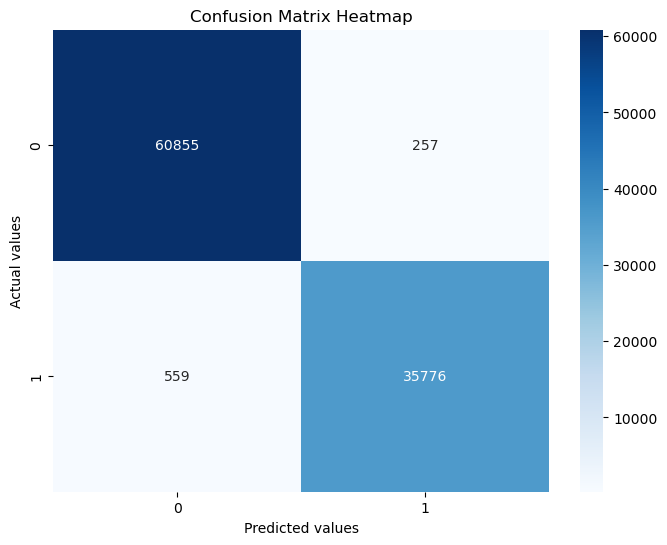

In [110]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix Heatmap')
plt.show()